<a href="https://colab.research.google.com/github/Clauciofds/Challenge-Data-Science2/blob/main/Challenge_Semana_I_v1_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


> Este é um projeto que tem como finalidade exercitar e desenvolver conhecimentos adiquiridos no curso que estou realizando pela Alura. Desta forma deve ser visto como um exercício e um projeto de desenvolvimento profissional.

# Lendo os dados

Deve-se indicar o caminho onde o arquivo está armazenado e neste caso descompactar o banco de dados.
O método abaixo e uma forma mais rapida e prática para rodar este df neste projeto.

A InsightPlaces disponibilizou os dados contidos no banco de dados quanto às informações de preços de imóveis da cidade do Rio de Janeiro

In [1]:
!ls

sample_data


In [2]:
!wget 'https://github.com/Clauciofds/Challenge-Data-Science2/raw/main/Dados/semana-1.zip' && unzip semana-1.zip -d dados/

--2022-12-07 16:21:12--  https://github.com/Clauciofds/Challenge-Data-Science2/raw/main/Dados/semana-1.zip
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Clauciofds/Challenge-Data-Science2/main/Dados/semana-1.zip [following]
--2022-12-07 16:21:12--  https://raw.githubusercontent.com/Clauciofds/Challenge-Data-Science2/main/Dados/semana-1.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18975214 (18M) [application/zip]
Saving to: ‘semana-1.zip’

semana-1.zip        100%[===================>]  18.10M  --.-KB/s    in 0.1s    

2022-12-07 16:21:13 (131 MB/s) - ‘semana-1.zip’ saved [18975214/18975

Nesta célula instalei e inicilizei um sessão do pyspark v.3.3.1 (2022/11)

In [3]:
!pip install pyspark==3.3.1
from pyspark.sql import SparkSession
spark = SparkSession.builder \
    .master('local[*]') \
    .appName('Transformando com Spark') \
    .getOrCreate()

spark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.4 MB 33 kB/s 
     |████████████████████████████████| 199 kB 55.7 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.1-py2.py3-none-any.whl size=281845512 sha256=acc441f13f339c3ed9106c290bcf9d04ec4b604485cd5b6343e8871f82dcd15a
  Stored in directory: /root/.cache/pip/wheels/43/dc/11/ec201cd671da62fa9c5cc77078235e40722170ceba231d7598
Successfully built pyspark


Lendo os dados descompactados


In [4]:
dados = spark.read.json('/content/dados/dataset_bruto.json')

Primeira varredura e verificação dos dados, sua informações, estrutura e volume.

*   Analise a quantidade de linhas e colunas;
*   Avalie a estrutura da base de dados;
*   Verifique se os tipos dos dados de cada coluna estão coerentes.

In [5]:
dados.show(5)
print(f'Total de cadastros:', dados.count(), '/ Total de colunas:', len(dados.columns))

+--------------------+--------------------+--------------------+
|             anuncio|             imagens|             usuario|
+--------------------+--------------------+--------------------+
|{0, [], [16], [0]...|[{39d6282a-71f3-4...|{9d44563d-3405-4e...|
|{0, [], [14], [0]...|[{23d2b3ab-45b0-4...|{36245be7-70fe-40...|
|{0, [1026], [1026...|[{1da65baa-368b-4...|{9dc415d8-1397-4d...|
|{0, [120], [120],...|[{79b542c6-49b4-4...|{9911a2df-f299-4a...|
|{0, [3], [3], [0]...|[{e2bc497b-6510-4...|{240a7aab-12e5-40...|
+--------------------+--------------------+--------------------+
only showing top 5 rows

Total de cadastros: 89083 / Total de colunas: 3


In [6]:
dados.printSchema()

root
 |-- anuncio: struct (nullable = true)
 |    |-- andar: long (nullable = true)
 |    |-- area_total: array (nullable = true)
 |    |    |-- element: string (containsNull = true)
 |    |-- area_util: array (nullable = true)
 |    |    |-- element: string (containsNull = true)
 |    |-- banheiros: array (nullable = true)
 |    |    |-- element: long (containsNull = true)
 |    |-- caracteristicas: array (nullable = true)
 |    |    |-- element: string (containsNull = true)
 |    |-- endereco: struct (nullable = true)
 |    |    |-- bairro: string (nullable = true)
 |    |    |-- cep: string (nullable = true)
 |    |    |-- cidade: string (nullable = true)
 |    |    |-- estado: string (nullable = true)
 |    |    |-- latitude: double (nullable = true)
 |    |    |-- longitude: double (nullable = true)
 |    |    |-- pais: string (nullable = true)
 |    |    |-- rua: string (nullable = true)
 |    |    |-- zona: string (nullable = true)
 |    |-- id: string (nullable = true)
 |    |-

Nossa base de dados possui 3 campos principais:

1.   anuncio
2.   imagens
2.   usuario

Para nossa análise, apenas as informações do campo "anuncio" serão relevantes. Por isso, vamos focar em analisar as colunas desse campo.

In [40]:
anuncio = dados\
      .select(
          'anuncio.*'
      )

In [8]:
anuncio.show(3)

+-----+----------+---------+---------+---------------+--------------------+--------------------+-------+------+------------+------------+---------+----+--------------------+
|andar|area_total|area_util|banheiros|caracteristicas|            endereco|                  id|quartos|suites|tipo_anuncio|tipo_unidade| tipo_uso|vaga|             valores|
+-----+----------+---------+---------+---------------+--------------------+--------------------+-------+------+------------+------------+---------+----+--------------------+
|    0|        []|     [16]|      [0]|             []|{Centro, 20061003...|47d553e0-79f2-4a4...|    [0]|   [0]|       Usado|      Outros|Comercial| [1]|[{260, 107, Venda...|
|    0|        []|     [14]|      [0]|             []|{Centro, 20051040...|b6ffbae1-17f6-487...|    [0]|    []|       Usado|      Outros|Comercial| [0]|[{260, 107, Venda...|
|    0|    [1026]|   [1026]|      [0]|             []|{Maria da Graça, ...|1fb030a5-9e3e-4a1...|    [0]|    []|       Usado|      

+-----------+-----+
|   tipo_uso|count|
+-----------+-----+
|  Comercial| 4542|
|Residencial|84541|
+-----------+-----+



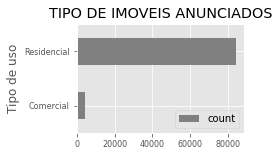

In [9]:
#Usando o select para quantificar os tipo de anuncio no DF.
anuncio_graf01 = anuncio\
      .groupBy('tipo_uso')\
      .count()

anuncio_graf01.show()

#para apresentação gráfica o DF foi convertido para Pandas
import matplotlib.pyplot as plt
import matplotlib

anuncio_graf01 = anuncio_graf01.toPandas()

plt.rcParams['figure.figsize'] = (3,2)
matplotlib.style.use('ggplot')

anuncio_graf01.plot.barh(
    x = 'tipo_uso',
    xlabel='Tipo de uso',
    color='gray',
    fontsize=8,
    title='TIPO DE IMOVEIS ANUNCIADOS'
)

O time de Data Science solicitou que fizéssemos alguns filtros nas colunas **#tipo_uso**, **#tipo_unidade** e #tipo_anuncio nossa base de dados:

* tipo_uso: Residencial;
* tipo_unidade: Apartamento;
* tipo_anuncio: Usado.



> Nota: Neste projeto em especifico eu atribui os filtros em diferente variáveis. Mas me indicaram avaliar essa necessidade, por que isso pode causar sobrecarga e aumentar o volume de dados processados na máquina local e/ou vitual causando lentidão no processo por uso desnecessário de recursos.



Filtrando por tipo residêncial

In [10]:
anuncio_residencial = anuncio\
      .filter("tipo_uso == 'Residencial'")

In [11]:
anuncio_residencial.show(3)

+-----+----------+---------+---------+--------------------+--------------------+--------------------+-------+------+------------+------------+-----------+----+--------------------+
|andar|area_total|area_util|banheiros|     caracteristicas|            endereco|                  id|quartos|suites|tipo_anuncio|tipo_unidade|   tipo_uso|vaga|             valores|
+-----+----------+---------+---------+--------------------+--------------------+--------------------+-------+------+------------+------------+-----------+----+--------------------+
|    0|     [120]|    [120]|      [0]|[Portão eletrônic...|{Campo Grande, 23...|ac6cb348-69d6-45a...|    [0]|    []|       Usado|      Outros|Residencial|  []|[{80, null, Venda...|
|    0|       [3]|      [3]|      [0]|                  []|{São Cristóvão, 2...|e032b908-ef42-4d4...|    [0]|    []|       Usado|      Outros|Residencial|  []|[{0, 0, Venda, 50...|
|    3|      [43]|     [43]|      [1]|[Academia, Churra...|{Paciência, 23585...|d2e3a3aa-09b5-4

Nesta célula para melhor interpretação das grandezas dos dodas filtrados foi necessário converter o parâmetro anuncio_graf02 para Pandas (me paraceu mais simples as linhas de comando).

+------------+-----+
|tipo_unidade|count|
+------------+-----+
|      Outros| 7517|
| Apartamento|66797|
|        Casa|10227|
+------------+-----+



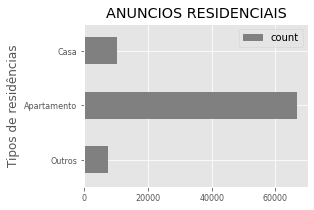

In [12]:
import pyspark
from pyspark.sql.functions import col, asc, desc

anuncio_graf02 = anuncio_residencial\
      .groupBy('tipo_unidade')\
      .count()

anuncio_graf02.show()

anuncio_graf02 = anuncio_graf02.toPandas()

plt.rcParams['figure.figsize'] = (4,3)
matplotlib.style.use('ggplot')

anuncio_graf02.plot.barh(
    x = 'tipo_unidade',
    xlabel = 'Tipos de residências',
    color = 'gray',
    fontsize = 8,
    title = 'ANUNCIOS RESIDENCIAIS'
)

Filtrando por tipo apartamentos

In [13]:
anuncio_apartamento = anuncio_residencial\
        .filter("tipo_unidade == 'Apartamento'")

anuncio_apartamento.show(3)

+-----+----------+---------+---------+--------------------+--------------------+--------------------+-------+------+------------+------------+-----------+----+--------------------+
|andar|area_total|area_util|banheiros|     caracteristicas|            endereco|                  id|quartos|suites|tipo_anuncio|tipo_unidade|   tipo_uso|vaga|             valores|
+-----+----------+---------+---------+--------------------+--------------------+--------------------+-------+------+------------+------------+-----------+----+--------------------+
|    3|      [43]|     [43]|      [1]|[Academia, Churra...|{Paciência, 23585...|d2e3a3aa-09b5-45a...|    [2]|    []|       Usado| Apartamento|Residencial| [1]|[{245, null, Vend...|
|    2|      [42]|     [42]|      [1]|[Churrasqueira, P...|{Paciência, 23585...|085bab2c-87ad-452...|    [2]|    []|       Usado| Apartamento|Residencial| [1]|[{0, 0, Venda, 15...|
|    1|      [41]|     [41]|      [1]|[Portaria 24h, Co...|{Guaratiba, 23036...|18d22cbe-1b86-4

Filtrando os apartamento pelo estado de uso.

In [14]:
anuncio_tipo_usado = anuncio_apartamento\
      .filter("tipo_anuncio == 'Usado'")

anuncio_tipo_usado\
      .groupBy('tipo_anuncio')\
      .count()\
      .show()

anuncio_tipo_usado.show(4)

+------------+-----+
|tipo_anuncio|count|
+------------+-----+
|       Usado|66562|
+------------+-----+

+-----+----------+---------+---------+--------------------+--------------------+--------------------+-------+------+------------+------------+-----------+----+--------------------+
|andar|area_total|area_util|banheiros|     caracteristicas|            endereco|                  id|quartos|suites|tipo_anuncio|tipo_unidade|   tipo_uso|vaga|             valores|
+-----+----------+---------+---------+--------------------+--------------------+--------------------+-------+------+------------+------------+-----------+----+--------------------+
|    3|      [43]|     [43]|      [1]|[Academia, Churra...|{Paciência, 23585...|d2e3a3aa-09b5-45a...|    [2]|    []|       Usado| Apartamento|Residencial| [1]|[{245, null, Vend...|
|    2|      [42]|     [42]|      [1]|[Churrasqueira, P...|{Paciência, 23585...|085bab2c-87ad-452...|    [2]|    []|       Usado| Apartamento|Residencial| [1]|[{0, 0, Ven

Como foi visto algumas colunas possuiem listas armazenando dados inteiros. Então precisamos verificar se dentro destas listas quantos dados elas pussuem, em seguida remover os dados dentro da lista. 
Exemplo: coluna quartos.

Verificação apenas da coluna quartos.

In [15]:
from pyspark.sql import functions as f

anuncio_tipo_usado\
        .select(f.size(f.col('quartos')).alias('quartos'))\
        .groupBy('quartos')\
        .count()\
        .show()

+-------+-----+
|quartos|count|
+-------+-----+
|      1|66562|
+-------+-----+



Código para verificar várias colunas simultaneamente.

In [16]:
caracteristicas = ['area_total', 'area_util', 'banheiros', 'quartos', 'suites', 'vaga', 'valores']

for col in caracteristicas:
    anuncio_tipo_usado\
        .select(f.size(f.col(col)).alias(col))\
        .groupBy(col)\
        .count()\
        .show()

+----------+-----+
|area_total|count|
+----------+-----+
|         1|57368|
|         0| 9194|
+----------+-----+

+---------+-----+
|area_util|count|
+---------+-----+
|        1|66562|
+---------+-----+

+---------+-----+
|banheiros|count|
+---------+-----+
|        1|66562|
+---------+-----+

+-------+-----+
|quartos|count|
+-------+-----+
|      1|66562|
+-------+-----+

+------+-----+
|suites|count|
+------+-----+
|     1|61008|
|     0| 5554|
+------+-----+

+----+-----+
|vaga|count|
+----+-----+
|   1|63545|
|   0| 3017|
+----+-----+

+-------+-----+
|valores|count|
+-------+-----+
|      1|65941|
|      2|  621|
+-------+-----+



Removendo os dados das listas.

In [17]:
anuncio_tipo_usado = anuncio_tipo_usado\
      .select([f.col(c)[0].alias(c) if c in caracteristicas else c for c in anuncio_tipo_usado.columns])

anuncio_tipo_usado.show(3)

+-----+----------+---------+---------+--------------------+--------------------+--------------------+-------+------+------------+------------+-----------+----+--------------------+
|andar|area_total|area_util|banheiros|     caracteristicas|            endereco|                  id|quartos|suites|tipo_anuncio|tipo_unidade|   tipo_uso|vaga|             valores|
+-----+----------+---------+---------+--------------------+--------------------+--------------------+-------+------+------------+------------+-----------+----+--------------------+
|    3|        43|       43|        1|[Academia, Churra...|{Paciência, 23585...|d2e3a3aa-09b5-45a...|      2|  null|       Usado| Apartamento|Residencial|   1|{245, null, Venda...|
|    2|        42|       42|        1|[Churrasqueira, P...|{Paciência, 23585...|085bab2c-87ad-452...|      2|  null|       Usado| Apartamento|Residencial|   1|{0, 0, Venda, 15000}|
|    1|        41|       41|        1|[Portaria 24h, Co...|{Guaratiba, 23036...|18d22cbe-1b86-4



---



---


Descrição
A equipe de ciência de dados nos solicitou que apenas as informações sobre bairro e zona da cidade fossem extraídas.

Então, vamos analisar a coluna endereco e transformar apenas as informações sobre **bairro e zona** em colunas de nosso DataFrame.

+---------+----------+
|   bairro|      zona|
+---------+----------+
|Paciência|Zona Oeste|
|Paciência|Zona Oeste|
|Guaratiba|Zona Oeste|
|   Cosmos|Zona Oeste|
+---------+----------+
only showing top 4 rows

+------------+-----+
|        zona|count|
+------------+-----+
|  Zona Norte|11897|
|  Zona Oeste|32979|
|Zona Central| 1144|
|    Zona Sul|20531|
|            |   11|
+------------+-----+



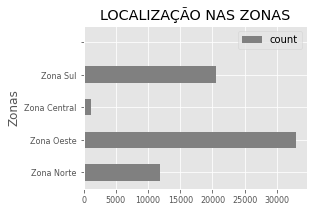

In [18]:
anuncio_zonas = anuncio_tipo_usado\
        .select(
            'endereco.*'
        )\
        .select(
            'bairro', 'zona'
        )

anuncio_zonas.show(4)

anuncio_graf03 = anuncio_zonas\
      .groupBy('zona')\
      .count()

anuncio_graf03.show()

anuncio_graf03 = anuncio_graf03.toPandas()

plt.rcParams['figure.figsize'] = (4,3)
matplotlib.style.use('ggplot')

anuncio_graf03.plot.barh(
    x = 'zona',
    xlabel = 'Zonas',
    color = 'gray',
    fontsize = 8,
    title = 'LOCALIZAÇÃO NAS ZONAS'
)



---



---


Pensando em simplificar a compreensão dos dados para as pessoas cientistas de dados, vamos entender a estrutura da coluna valores que é a mais importante da base de dados.

1. root
2.   |  -- valores: array (nullable = true)
3.   |     |  -- element: struct (containsNull = true)
4.   |     |      |  -- condominio: string (nullable = true)
5.   |     |      |  -- iptu: string (nullable = true) 
6.   |     |      |  -- tipo: string (nullable = true)
7.   |     |      |  -- valor: string (nullable = true)

Podemos observar que os valores são do tipo array, ou seja, uma lista que contém elementos. Estes elementos são dicionários com as informações de condominio, iptu, tipo, e valor.

Nesse contexto, transforme os dados da coluna valores em colunas separadas.

In [21]:
from pyspark.sql.types import DoubleType, StringType

anuncio_valores = anuncio_tipo_usado\
      .select(
          'valores.*'
      )\
      
anuncio_valores = anuncio_valores\
      .withColumn(
          'condominio', anuncio_valores['condominio'].cast(DoubleType())
      )\
      .withColumn(
          'iptu', anuncio_valores['iptu'].cast(DoubleType())
      )\
      .withColumn(
          'valor', anuncio_valores['valor'].cast(DoubleType())
      )

anuncio_valores.show(4)

sumario_01 = anuncio_valores.select('condominio', 'iptu', 'valor').summary('min', 'mean', 'max')

sumario_01.show()

# sumario_01 = sumario_01.toPandas()
# sumario_01.round(2)

# decimals = spark.Series([2, 2, 2], index=['condominio', 'iptu', 'valor'])
# sumario_01.round(2)

+----------+----+-----+-------+
|condominio|iptu| tipo|  valor|
+----------+----+-----+-------+
|     245.0|null|Venda|15000.0|
|       0.0| 0.0|Venda|15000.0|
|       0.0| 0.0|Venda|20000.0|
|     285.0|null|Venda|20000.0|
+----------+----+-----+-------+
only showing top 4 rows

+-------+----------------+-----------------+------------------+
|summary|      condominio|             iptu|             valor|
+-------+----------------+-----------------+------------------+
|    min|             0.0|              0.0|             550.0|
|   mean|4822.03303120912|5447.897878073425|1289596.0820137616|
|    max|           1.1E7|            2.0E7|            1.39E7|
+-------+----------------+-----------------+------------------+





---



---


A InsightPlaces permite que o(a) anunciante crie um anúncio com duas opções de valor. Assim, o(a) cliente pode criar um anúncio que mostre tanto o valor de venda do imóvel quanto o seu valor de locação, juntamente com os valores de taxa de condomínio (quando houver) e taxa de IPTU. Estes valores são diferenciados pelo campo tipo que pode assumir os valores Venda e Aluguel.

Como se trata de um estudo sobre o preço de venda dos imóveis, o time de cientistas de dados solicitou apenas as informações do tipo **VENDA**.

Selecione apenas os valores de Venda

In [22]:
anuncio_valores\
      .filter("tipo == 'Venda'")\
      .show(4)

+----------+----+-----+-------+
|condominio|iptu| tipo|  valor|
+----------+----+-----+-------+
|     245.0|null|Venda|15000.0|
|       0.0| 0.0|Venda|15000.0|
|       0.0| 0.0|Venda|20000.0|
|     285.0|null|Venda|20000.0|
+----------+----+-----+-------+
only showing top 4 rows



In [ ]:
anuncio_tipo_usado.printSchema()

---
Salvar o arquivo no formato parquet

In [29]:
anuncio_tipo_usado.write.parquet(
    '/content/dados/parquet',
    mode='overwrite'
)

In [32]:
anuncio_tipo_usado_parquet = spark.read.parquet(
    '/content/dados/parquet',
    sep=';',
    inferSchema=True,
    header=True
)

anuncio_tipo_usado_parquet.show(5)

+-----+----------+---------+---------+--------------------+--------------------+--------------------+-------+------+------------+------------+-----------+----+--------------------+
|andar|area_total|area_util|banheiros|     caracteristicas|            endereco|                  id|quartos|suites|tipo_anuncio|tipo_unidade|   tipo_uso|vaga|             valores|
+-----+----------+---------+---------+--------------------+--------------------+--------------------+-------+------+------------+------------+-----------+----+--------------------+
|    3|        43|       43|        1|[Academia, Churra...|{Paciência, 23585...|d2e3a3aa-09b5-45a...|      2|  null|       Usado| Apartamento|Residencial|   1|{245, null, Venda...|
|    2|        42|       42|        1|[Churrasqueira, P...|{Paciência, 23585...|085bab2c-87ad-452...|      2|  null|       Usado| Apartamento|Residencial|   1|{0, 0, Venda, 15000}|
|    1|        41|       41|        1|[Portaria 24h, Co...|{Guaratiba, 23036...|18d22cbe-1b86-4

Você pode utilizar o %%time para verificar o tempo de execução de determinado código.

In [49]:
%time
anuncio = spark.read.parquet(
    '/content/dados/parquet',
    sep=';',
    inferSchema=True,
    header=True
)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.39 µs


In [48]:
%time
anuncio = spark.read.json(
    '/content/dados/dataset_bruto.json',
)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.63 µs
